<a href="https://colab.research.google.com/github/RecSys-lab/MM-VideoRec/blob/main/colabs/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ViLLA-MMBench: Visualization of Results**

- 📝 Paper Submitted to RecSys'25

**I. Data Loading**

In [1]:
import pandas as pd

# Variables
csvFilePath = 'https://raw.githubusercontent.com/RecSys-lab/MM-VideoRec/refs/heads/main/evaluation.csv'

# Load CSV into a DataFrame
evalDf = pd.read_csv(csvFilePath)
evalDf.head()

,Model,Data,NoModality,Textual,Visual,Audio,NoFusion,FusedPCA,FusedCCA,Recall10,NDCG10,ColdRate10,Coverage10,PopBias,Fairness,Novelty,Diversity,CalibrationBias
0,MF,-,1,0,0,0,1,0,0,0.077,0.130,0.011,0.651,0.019,0.339,11.546,0.796,5.138
1,TopPop,-,1,0,0,0,1,0,0,0.126,0.210,0.066,0.100,0.039,0.196,10.587,0.806,3.640
2,VAECF,-,1,0,0,0,1,0,0,0.249,0.358,0.015,0.867,0.025,0.350,11.272,0.720,3.564
3,VBPR,Text-rawOpenAI,0,1,0,0,1,0,0,0.237,0.359,0.023,0.817,0.034,0.254,10.893,0.770,2.832
4,VBPR,Text-rawLlama,0,1,0,0,1,0,0,0.225,0.339,0.026,0.807,0.028,0.264,11.078,0.782,2.704


**📊 II. Bar Chart to Show the Impact of Augmentation on Text Data**

In [2]:
# Filter the main DF to have only related data for a bar chart
textualDf = evalDf[(evalDf['Textual'] == 1) & (evalDf['NoFusion'] == 1)][['Model', 'Data', 'Recall10', 'NDCG10']]

# Improved DF cells
textualDf = textualDf.rename(columns={'Recall10': 'Recall@10', 'NDCG10': 'NDCG@10'})
textualDf['Data'] = textualDf['Data'].str.replace('Text-', '', regex=False)
textualDf['Data'] = textualDf['Data'].str.replace('raw', 'Raw ', regex=False)
textualDf['Data'] = textualDf['Data'].str.replace('llm', 'LLM ', regex=False)

# Inform the user
print(f'✨ Unimodal Text Data has {len(textualDf)} instances, such as:\n')
print(textualDf.head(5))

# Various frames
textualDf_amr_ndcg = textualDf[textualDf['Model'] == 'AMR'][['Data', 'NDCG@10']]
textualDf_vbpr_ndcg = textualDf[textualDf['Model'] == 'VBPR'][['Data', 'NDCG@10']]
textualDf_amr_recall = textualDf[textualDf['Model'] == 'AMR'][['Data', 'Recall@10']]
textualDf_vbpr_recall = textualDf[textualDf['Model'] == 'VBPR'][['Data', 'Recall@10']]

✨ Unimodal Text Data has 12 instances, such as:

  Model        Data  Recall@10  NDCG@10
3  VBPR  Raw OpenAI      0.237    0.359
4  VBPR   Raw Llama      0.225    0.339
5  VBPR      Raw ST      0.232    0.342
6  VBPR  LLM OpenAI      0.241    0.362
7  VBPR   LLM Llama      0.224    0.340


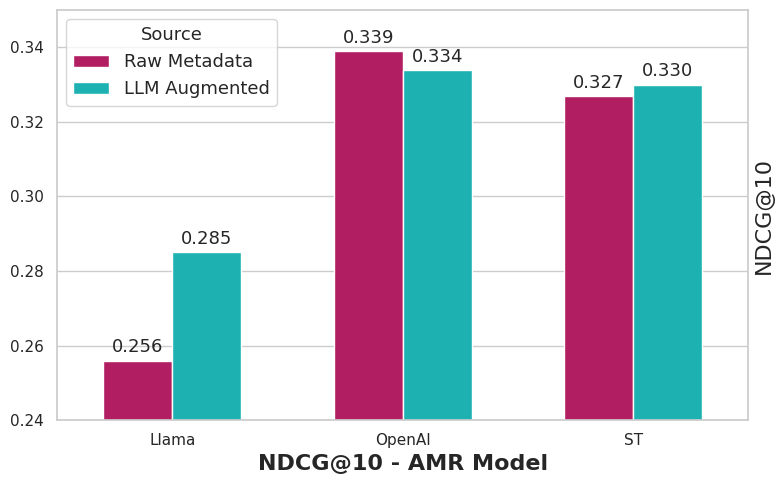

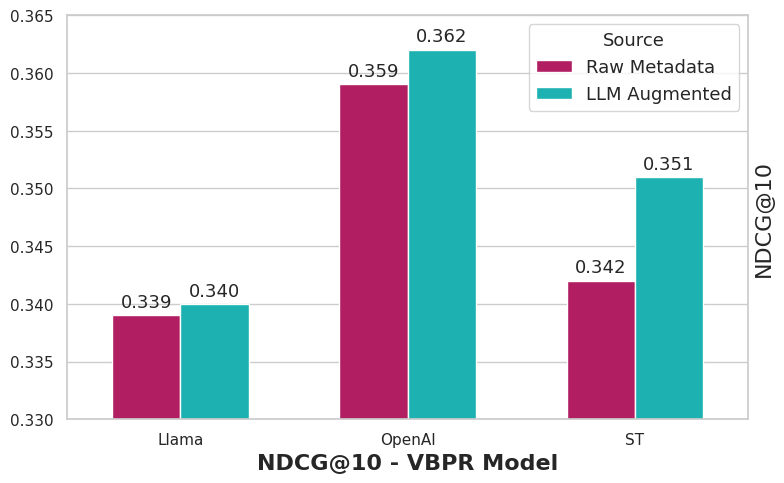

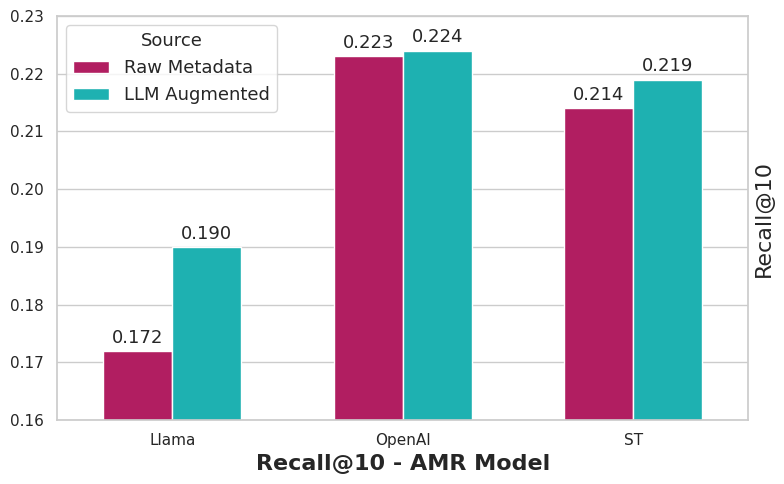

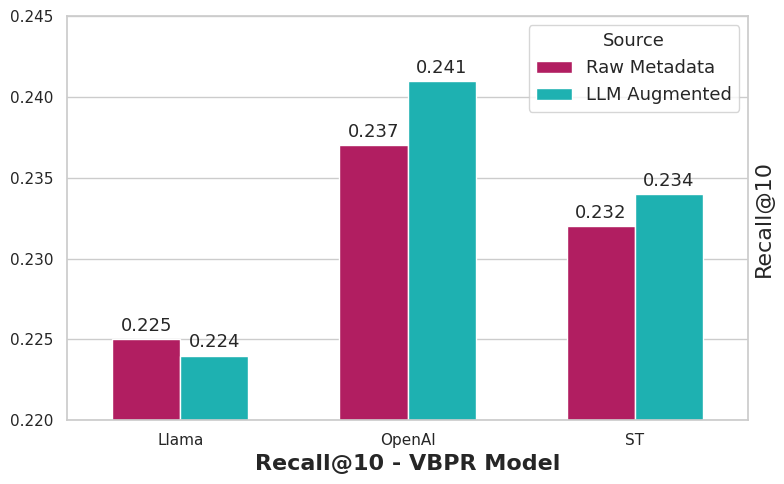

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn theme
sns.set(style="whitegrid")

# Extracting Source and Type for Raw and LLM Groupping
textualDf_amr_ndcg[['Type', 'Source']] = textualDf_amr_ndcg['Data'].str.split(' ', expand=True)
textualDf_vbpr_ndcg[['Type', 'Source']] = textualDf_vbpr_ndcg['Data'].str.split(' ', expand=True)
textualDf_amr_recall[['Type', 'Source']] = textualDf_amr_recall['Data'].str.split(' ', expand=True)
textualDf_vbpr_recall[['Type', 'Source']] = textualDf_vbpr_recall['Data'].str.split(' ', expand=True)

# Pivoting the DFs to have OpenAI/Llama/ST in rows and Raw/LLM in columns
pivotTextualDf_amr_ndcg = textualDf_amr_ndcg.pivot(index='Source', columns='Type', values='NDCG@10')
pivotTextualDf_vbpr_ndcg = textualDf_vbpr_ndcg.pivot(index='Source', columns='Type', values='NDCG@10')
pivotTextualDf_amr_recall = textualDf_amr_recall.pivot(index='Source', columns='Type', values='Recall@10')
pivotTextualDf_vbpr_recall = textualDf_vbpr_recall.pivot(index='Source', columns='Type', values='Recall@10')

# Reseting the indices
dfPlot_amr_ndcg = pivotTextualDf_amr_ndcg.reset_index().melt(id_vars='Source', var_name='Type', value_name='NDCG@10')
dfPlot_vbpr_ndcg = pivotTextualDf_vbpr_ndcg.reset_index().melt(id_vars='Source', var_name='Type', value_name='NDCG@10')
dfPlot_amr_recall = pivotTextualDf_amr_recall.reset_index().melt(id_vars='Source', var_name='Type', value_name='Recall@10')
dfPlot_vbpr_recall = pivotTextualDf_vbpr_recall.reset_index().melt(id_vars='Source', var_name='Type', value_name='Recall@10')

# Chart dictionary
charts = {
    'AMR-NDCG': dfPlot_amr_ndcg,
    'VBPR-NDCG': dfPlot_vbpr_ndcg,
    'AMR-Recall': dfPlot_amr_recall,
    'VBPR-Recall': dfPlot_vbpr_recall
}

palette = {'Raw': '#ca055f', 'LLM': '#05caca'}

# Creating charts
for chart in charts:
  # Variables
  model = chart.split('-')[0] # AMR/VBPR
  metric = chart.split('-')[1] # NDCG/Recall
  dfPlot = charts[chart]
  valueCol = f'{metric}@10'
  rangeTop = (0.23 if metric == 'Recall' else 0.35) if model == 'AMR' else (0.245 if metric == 'Recall' else 0.365)
  rangeBottom = (0.16 if metric == 'Recall' else 0.24) if model == 'AMR' else (0.22 if metric == 'Recall' else 0.33)

  # Plotting
  plt.figure(figsize=(8, 5))
  ax = sns.barplot(data=dfPlot, x='Source', y=valueCol, hue='Type', hue_order=['Raw', 'LLM'],
                   palette=palette, dodge=0.3, width=0.6)

  # Add value labels on top of bars
  for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=13, padding=3)

  # Formatting
  ax.yaxis.set_label_position("right")
  plt.title('')
  plt.xlabel(f'{metric}@10 - {model} Model', fontsize=16, weight='bold')
  plt.ylim(rangeBottom, rangeTop)
  plt.ylabel(valueCol, fontsize=16)

  # Custom legend
  handles, labels = ax.get_legend_handles_labels()
  new_labels = ['Raw Metadata' if lbl == 'Raw' else 'LLM Augmented' for lbl in labels]
  # plt.legend(title='Source', title_fontsize=13, fontsize=14)
  ax.legend(handles, new_labels, title='Source', title_fontsize=13, fontsize=13)

  plt.tight_layout()
  plt.savefig(f'Text_{chart}.pdf', dpi=300)
  plt.show()

**📊 II. Scatter Chart to Show the Modality Combination Impact**

*II-A Baselines and PCA-combined*

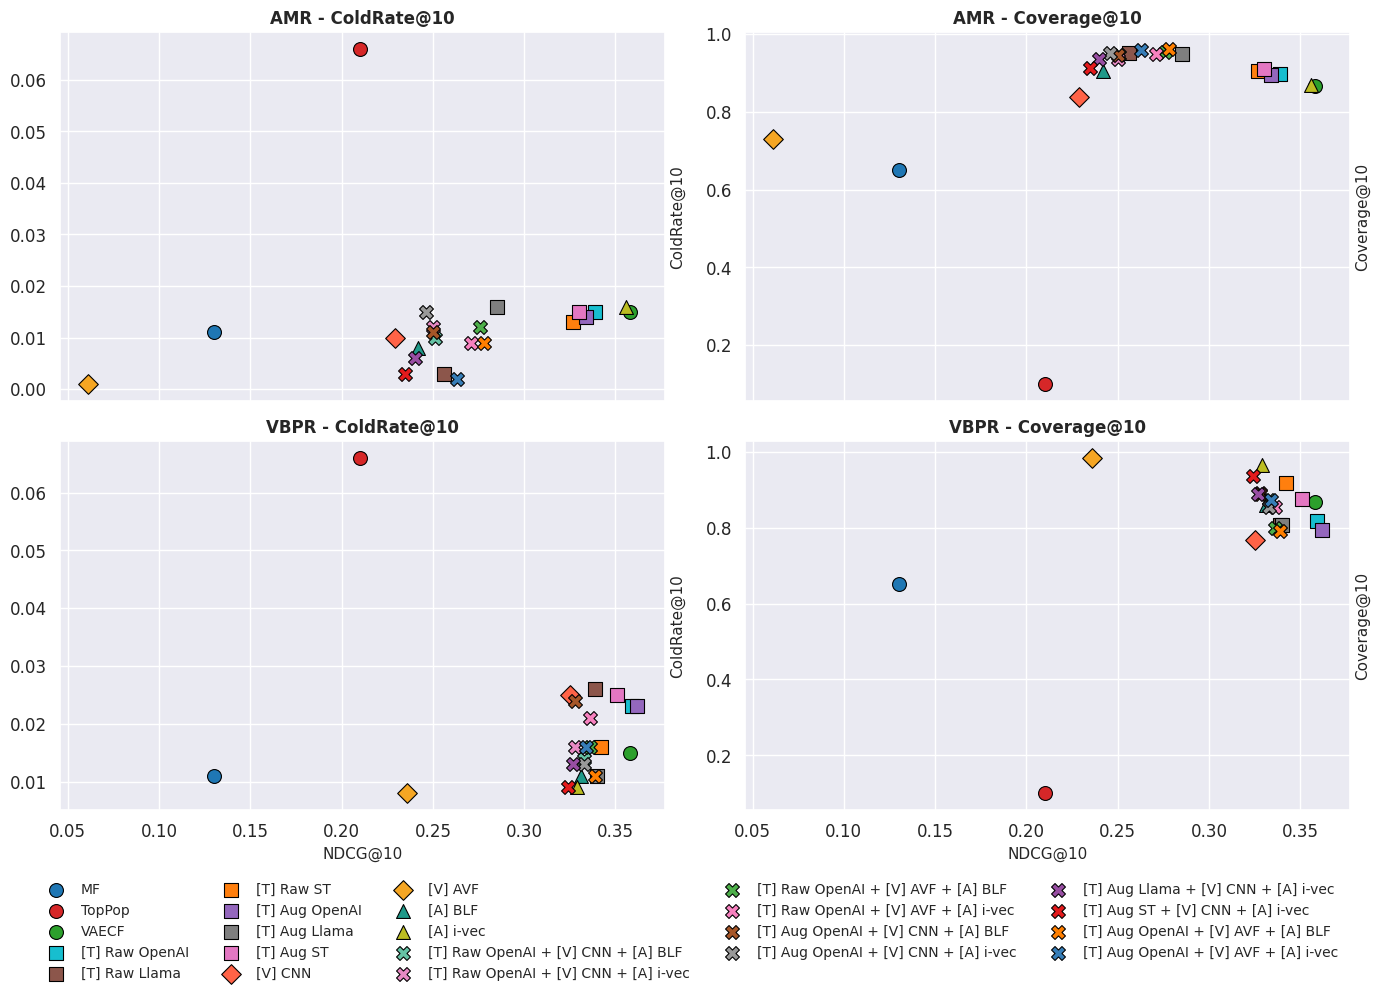

In [4]:
# Keep a copy of evalDF
evalDf_copy = evalDf[['Model', 'Data', 'Coverage10', 'NDCG10', 'ColdRate10', 'FusedPCA', 'FusedCCA']]

# Add the value of Model in Data column for baselines (as their data column is empty)
evalDf_copy.loc[evalDf_copy['Model'].isin(['MF', 'TopPop', 'VAECF']), 'Data'] = evalDf_copy['Model']

# Improved DF cells
evalDf_copy = evalDf_copy.rename(columns={'ColdRate10': 'ColdRate@10', 'NDCG10': 'NDCG@10', 'Coverage10': 'Coverage@10'})
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('-', ' ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('Text raw', '[T] Raw ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('Text llm', '[T] Aug ', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('Visual', '[V]', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('Audio', '[A]', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('[A] iVector', '[A] i-vec', regex=False)
# evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('CNN', 'AlexNet', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('rawOpenAI', '[T] Raw OpenAI +', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('llmOpenAI', '[T] Aug OpenAI +', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('llmLlama', '[T] Aug Llama +', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('llmST', '[T] Aug ST +', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('CNN BLF', '[V] CNN + [A] BLF', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('CNN IV', '[V] CNN + [A] i-vec', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('AVF BLF', '[V] AVF + [A] BLF', regex=False)
evalDf_copy['Data'] = evalDf_copy['Data'].str.replace('AVF IV', '[V] AVF + [A] i-vec', regex=False)

# Keep only PCA ones
evalDf_copy_CCA = evalDf_copy[evalDf_copy['FusedPCA'] != 1].copy()
evalDf_copy = evalDf_copy[evalDf_copy['FusedCCA'] != 1].copy()

# Filter the main DF to have only related data for the chart
coldRateDF_amr = evalDf_copy[evalDf_copy['Model'] != 'VBPR'][['Data', 'NDCG@10', 'ColdRate@10']]
coverageDF_amr = evalDf_copy[evalDf_copy['Model'] != 'VBPR'][['Data', 'NDCG@10', 'Coverage@10']]
coldRateDF_vbpr = evalDf_copy[evalDf_copy['Model'] != 'AMR'][['Data', 'NDCG@10', 'ColdRate@10']]
coverageDF_vbpr = evalDf_copy[evalDf_copy['Model'] != 'AMR'][['Data', 'NDCG@10', 'Coverage@10']]

# Chart dictionary
charts = {
    'AMR-ColdRate': coldRateDF_amr,
    'AMR-Coverage': coverageDF_amr,
    'VBPR-ColdRate': coldRateDF_vbpr,
    'VBPR-Coverage': coverageDF_vbpr
}

# Define type-based groups for marker styles
marker_map = {
    'Baseline': ['MF', 'TopPop', 'VAECF'],
    'Text': ['[T]'],
    'Audio': ['[A]'],
    'Visual': ['[V]'],
    'Fusion': []  # default fallback
}

# Define marker styles per group
marker_styles = {
    'Baseline': 'o',    # circle
    'Text': 's',        # square
    'Audio': '^',       # triangle
    'Visual': 'D',      # diamond
    'Fusion': 'X'       # X
}

# Function to determine marker type by matching Data string
def get_marker(data_label):
  for group, keywords in marker_map.items():
    # if any(data_label.startswith(k) for k in keywords):
    if any(data_label.startswith(k) for k in keywords) and "+" not in data_label:
      return marker_styles[group]
  return marker_styles['Fusion']

# Unique data labels
all_data_labels = evalDf_copy['Data'].unique()

# Preparing the chart
sns.set_theme(style="darkgrid", font_scale=1.1)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()  # Flatten the 2D array for easy indexing

# Collect handles/labels for a shared legend
handles, labels = [], []

palette = {
    # 🔵 Circle (Baselines)
    'MF': '#1f77b4',         # vivid blue
    'TopPop': '#d62728',     # bright red
    'VAECF': '#2ca02c',      # green

    # 🟥 Square (Text)
    '[T] Raw ST': '#ff7f0e',        # orange
    '[T] Aug OpenAI': '#9467bd',    # purple
    '[T] Raw Llama': '#8c564b',     # brown
    '[T] Aug ST': '#e377c2',        # pink
    '[T] Raw OpenAI': '#17becf',    # cyan
    '[T] Aug Llama': '#7f7f7f',     # gray

    # 🔷 Diamond (Audio)
    '[A] i-vec': '#bcbd22',      # olive green
    '[A] BLF': '#1f9989',          # teal

    # 🔺 Triangle (Visual)
    '[V] AVF': '#f5a623',         # amber
    '[V] CNN': '#ff6347',     # tomato red

    # ❌ Cross (Fusion)
    '[T] Aug ST + [V] CNN + [A] i-vec': '#e41a1c',         # red
    '[T] Aug OpenAI + [V] AVF + [A] i-vec': '#377eb8',         # blue
    '[T] Raw OpenAI + [V] AVF + [A] BLF': '#4daf4a',             # green
    '[T] Aug Llama + [V] CNN + [A] i-vec': '#984ea3',      # purple
    '[T] Aug OpenAI + [V] AVF + [A] BLF': '#ff7f00',             # orange
    '[T] Aug OpenAI + [V] CNN + [A] BLF': '#a65628',         # brown
    '[T] Raw OpenAI + [V] AVF + [A] i-vec': '#f781bf',         # pink
    '[T] Aug OpenAI + [V] CNN + [A] i-vec': '#999999',     # gray
    '[T] Raw OpenAI + [V] CNN + [A] BLF': '#66c2a5',         # mint green
    '[T] Raw OpenAI + [V] CNN + [A] i-vec': '#e78ac3'      # light pink
}

# Loop through charts and axes
for i, (chart, dfPlot) in enumerate(charts.items()):
    model = chart.split('-')[0]  # AMR/VBPR
    metric = chart.split('-')[1]  # ColdRate/Coverage
    valueCol = f'{metric}@10'

    ax = axes[i]

    # Plot each point individually with its marker and color
    for label in dfPlot['Data'].unique():
      sub_df = dfPlot[dfPlot['Data'] == label]
      marker = get_marker(label)
      color = palette[label]

      p = sns.scatterplot(
        data=sub_df,
        x='NDCG@10', y=valueCol,
        label=label,
        ax=ax,
        s=100,
        marker=marker,
        color=color,
        edgecolor='black'
      )

    ax.set_title(f'{model} - {metric}@10', weight='bold', fontsize=12)
    ax.set_xlabel('NDCG@10', fontsize=11)
    ax.set_ylabel(f'{metric}@10', fontsize=11)
    ax.yaxis.set_label_position("right")
    ax.grid(True)

    # Capture legend handles/labels only once
    if i == 0:
      handles, labels = ax.get_legend_handles_labels()
    ax.legend().remove()  # Remove individual legends

# Shared legend at the bottom
fig.legend(handles, labels, loc='lower center', ncol=5,
    fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for the legend
plt.subplots_adjust(bottom=0.18)
plt.savefig(f'Combined_PCA.pdf', dpi=300)
plt.show()

*II-A Baselines and CCA-combined*

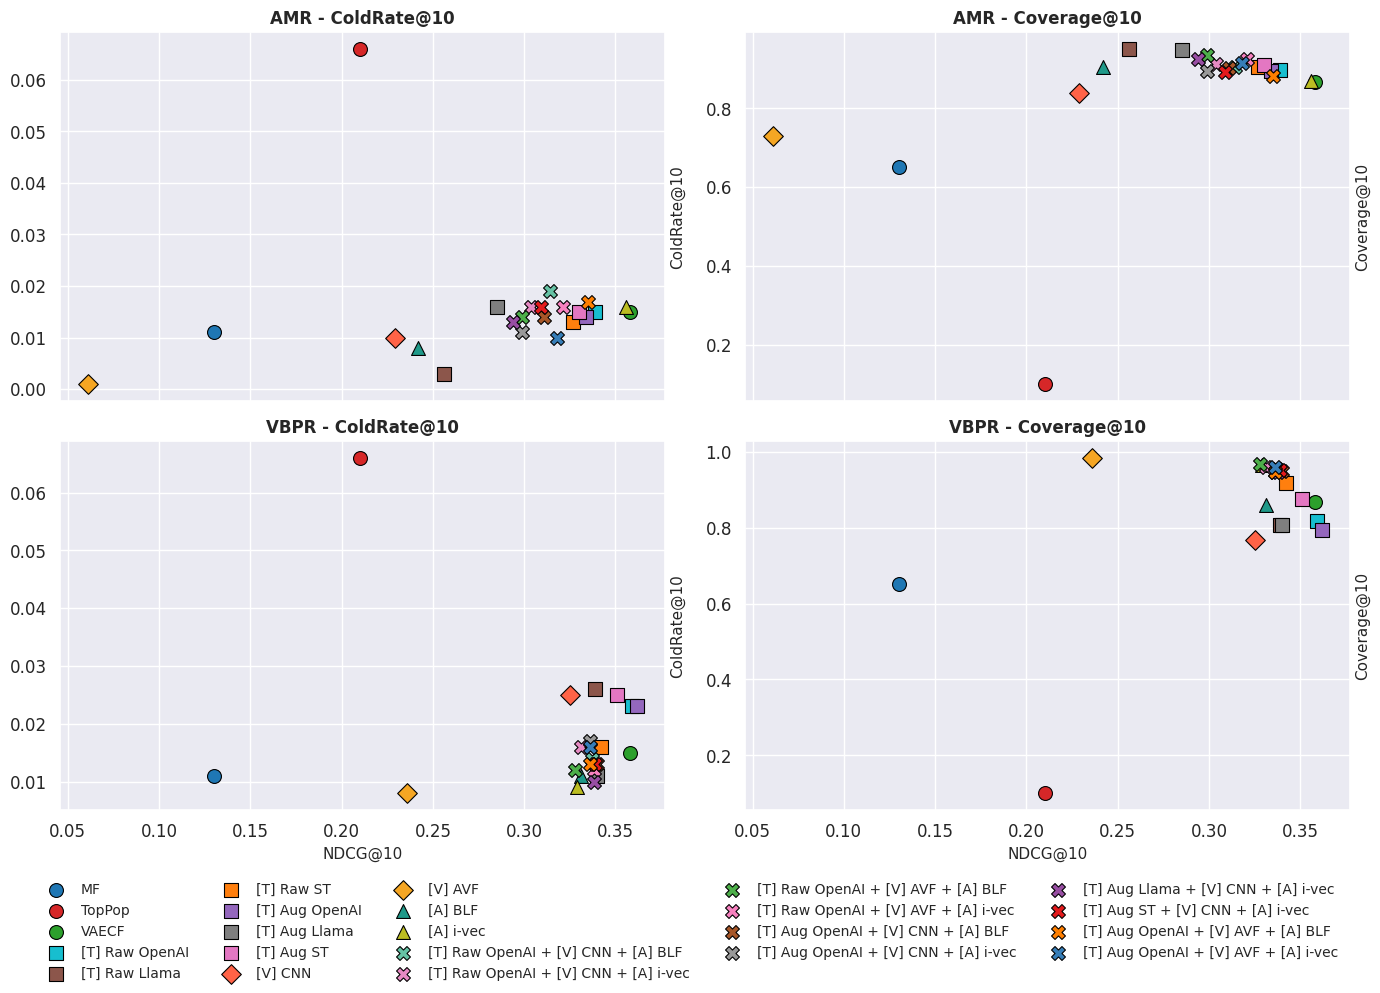

In [5]:
# Filter the main DF to have only related data for the chart
coldRateDF_amr = evalDf_copy_CCA[evalDf_copy_CCA['Model'] != 'VBPR'][['Data', 'NDCG@10', 'ColdRate@10']]
coverageDF_amr = evalDf_copy_CCA[evalDf_copy_CCA['Model'] != 'VBPR'][['Data', 'NDCG@10', 'Coverage@10']]
coldRateDF_vbpr = evalDf_copy_CCA[evalDf_copy_CCA['Model'] != 'AMR'][['Data', 'NDCG@10', 'ColdRate@10']]
coverageDF_vbpr = evalDf_copy_CCA[evalDf_copy_CCA['Model'] != 'AMR'][['Data', 'NDCG@10', 'Coverage@10']]

# Chart dictionary
charts = {
    'AMR-ColdRate': coldRateDF_amr,
    'AMR-Coverage': coverageDF_amr,
    'VBPR-ColdRate': coldRateDF_vbpr,
    'VBPR-Coverage': coverageDF_vbpr
}


# Unique data labels
all_data_labels = evalDf_copy['Data'].unique()

# Preparing the chart
sns.set_theme(style="darkgrid", font_scale=1.1)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()  # Flatten the 2D array for easy indexing

# Collect handles/labels for a shared legend
handles, labels = [], []

# Loop through charts and axes
for i, (chart, dfPlot) in enumerate(charts.items()):
    model = chart.split('-')[0]  # AMR/VBPR
    metric = chart.split('-')[1]  # ColdRate/Coverage
    valueCol = f'{metric}@10'

    ax = axes[i]

    # Plot each point individually with its marker and color
    for label in dfPlot['Data'].unique():
      sub_df = dfPlot[dfPlot['Data'] == label]
      marker = get_marker(label)
      color = palette[label]

      p = sns.scatterplot(
        data=sub_df,
        x='NDCG@10', y=valueCol,
        label=label,
        ax=ax,
        s=100,
        marker=marker,
        color=color,
        edgecolor='black'
      )

    ax.set_title(f'{model} - {metric}@10', weight='bold', fontsize=12)
    ax.set_xlabel('NDCG@10', fontsize=11)
    ax.set_ylabel(f'{metric}@10', fontsize=11)
    ax.yaxis.set_label_position("right")
    ax.grid(True)

    # Capture legend handles/labels only once
    if i == 0:
      handles, labels = ax.get_legend_handles_labels()
    ax.legend().remove()  # Remove individual legends

# Shared legend at the bottom
fig.legend(handles, labels, loc='lower center', ncol=5,
    fontsize=10, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for the legend
plt.subplots_adjust(bottom=0.18)
plt.savefig(f'Combined_CCA.pdf', dpi=300)
plt.show()

**III. Area Under Curve Calculation (NDCG-Coverage/ColdRate)**

*III-A All Data Excluding CCA*

In [6]:
from IPython.display import display

# Store top-15 'Data' values for each combo
top15_sets = {}

def compute_auc_and_rank(df, model_name, value_col):
    # Filter by model
    df_model = df[df['Model'] == model_name].copy()

    # Normalize NDCG and value_col using min-max normalization
    for col in ['NDCG@10', value_col]:
        min_val = df_model[col].min()
        max_val = df_model[col].max()
        df_model[f'{col}_norm'] = (df_model[col] - min_val) / (max_val - min_val + 1e-9)  # Avoid division by zero

    # Compute AUC with normalized values
    df_model['AUC'] = df_model['NDCG@10_norm'] * df_model[f'{value_col}_norm']

    # Sort by AUC
    top15 = df_model.nlargest(15, 'AUC')[['Data', 'NDCG@10', value_col, 'AUC']]
    top15_sets[(model_name, value_col)] = set(top15['Data'])
    # [Optional]
    bottom15 = df_model.nsmallest(15, 'AUC')[['Data', 'NDCG@10', value_col, 'AUC']]

    print(f"\n🏆 Top 15 by Normalized AUC ({model_name} - {value_col}):")
    display(top15)

    # print(f"\n🔻 Bottom 15 by Normalized AUC ({model_name} - {value_col}):")
    # display(bottom15)

    print('\n\n')

# Run for both models and metrics
for model in ['AMR', 'VBPR']:
    for metric in ['ColdRate@10', 'Coverage@10']:
        compute_auc_and_rank(evalDf_copy, model, metric)

# Find common entries in all four top-10 sets
common_data = set.intersection(*top15_sets.values())

print("\n✅ Common datasets in all four Top-15s:")
print(common_data)


🏆 Top 15 by Normalized AUC (AMR - ColdRate@10):


,Data,NDCG@10,ColdRate@10,AUC
42,[A] i-vec,0.356,0.016,1.000000
33,[T] Raw OpenAI,0.339,0.015,0.879548
38,[T] Aug ST,0.330,0.015,0.851073
36,[T] Aug OpenAI,0.334,0.014,0.802034
37,[T] Aug Llama,0.285,0.016,0.759322
35,[T] Raw ST,0.327,0.013,0.721356
48,[T] Aug OpenAI + [V] CNN + [A] i-vec,0.246,0.015,0.585311
45,[T] Raw OpenAI + [V] AVF + [A] BLF,0.276,0.012,0.534463
44,[T] Raw OpenAI + [V] CNN + [A] i-vec,0.250,0.012,0.469830
47,[T] Aug OpenAI + [V] CNN + [A] BLF,0.250,0.011,0.427119






🏆 Top 15 by Normalized AUC (AMR - Coverage@10):


,Data,NDCG@10,Coverage@10,AUC
51,[T] Aug OpenAI + [V] AVF + [A] BLF,0.278,0.962,0.735593
37,[T] Aug Llama,0.285,0.948,0.713698
38,[T] Aug ST,0.330,0.909,0.704445
45,[T] Raw OpenAI + [V] AVF + [A] BLF,0.276,0.953,0.700662
35,[T] Raw ST,0.327,0.906,0.684979
33,[T] Raw OpenAI,0.339,0.897,0.679479
52,[T] Aug OpenAI + [V] AVF + [A] i-vec,0.263,0.960,0.678868
46,[T] Raw OpenAI + [V] AVF + [A] i-vec,0.271,0.948,0.669091
36,[T] Aug OpenAI,0.334,0.894,0.655343
34,[T] Raw Llama,0.256,0.951,0.629810






🏆 Top 15 by Normalized AUC (VBPR - ColdRate@10):


,Data,NDCG@10,ColdRate@10,AUC
8,[T] Aug ST,0.351,0.025,0.861993
6,[T] Aug OpenAI,0.362,0.023,0.833333
4,[T] Raw Llama,0.339,0.026,0.817460
3,[T] Raw OpenAI,0.359,0.023,0.813492
9,[V] CNN,0.325,0.025,0.667108
17,[T] Aug OpenAI + [V] CNN + [A] BLF,0.328,0.024,0.649030
16,[T] Raw OpenAI + [V] AVF + [A] i-vec,0.336,0.021,0.573192
5,[T] Raw ST,0.342,0.016,0.373898
15,[T] Raw OpenAI + [V] AVF + [A] BLF,0.336,0.016,0.352734
22,[T] Aug OpenAI + [V] AVF + [A] i-vec,0.334,0.016,0.345679






🏆 Top 15 by Normalized AUC (VBPR - Coverage@10):


,Data,NDCG@10,Coverage@10,AUC
12,[A] i-vec,0.329,0.966,0.676301
5,[T] Raw ST,0.342,0.918,0.583020
20,[T] Aug ST + [V] CNN + [A] i-vec,0.324,0.937,0.545736
8,[T] Aug ST,0.351,0.875,0.449982
14,[T] Raw OpenAI + [V] CNN + [A] i-vec,0.328,0.892,0.417719
19,[T] Aug Llama + [V] CNN + [A] i-vec,0.327,0.890,0.406460
17,[T] Aug OpenAI + [V] CNN + [A] BLF,0.328,0.888,0.404134
22,[T] Aug OpenAI + [V] AVF + [A] i-vec,0.334,0.872,0.372610
13,[T] Raw OpenAI + [V] CNN + [A] BLF,0.333,0.873,0.372388
11,[A] BLF,0.331,0.859,0.315615






✅ Common datasets in all four Top-15s:
{'[T] Aug OpenAI + [V] CNN + [A] i-vec', '[T] Aug ST', '[T] Aug OpenAI + [V] CNN + [A] BLF', '[T] Aug Llama', '[T] Raw OpenAI + [V] CNN + [A] BLF', '[T] Raw OpenAI + [V] CNN + [A] i-vec', '[T] Raw OpenAI', '[T] Raw OpenAI + [V] AVF + [A] i-vec', '[T] Raw ST'}


*III-B All Data Excluding PCA*

In [7]:
# Store top-15 'Data' values for each combo
top15_sets = {}

# Run for both models and metrics
for model in ['AMR', 'VBPR']:
    for metric in ['ColdRate@10', 'Coverage@10']:
        compute_auc_and_rank(evalDf_copy_CCA, model, metric)

# Find common entries in all four top-10 sets
common_data = set.intersection(*top15_sets.values())

print("\n✅ Common datasets in all four Top-15s:")
print(common_data)


🏆 Top 15 by Normalized AUC (AMR - ColdRate@10):


,Data,NDCG@10,ColdRate@10,AUC
53,[T] Raw OpenAI + [V] CNN + [A] BLF,0.314,0.019,0.857627
42,[A] i-vec,0.356,0.016,0.833333
61,[T] Aug OpenAI + [V] AVF + [A] BLF,0.335,0.017,0.825612
56,[T] Raw OpenAI + [V] AVF + [A] i-vec,0.321,0.016,0.734463
33,[T] Raw OpenAI,0.339,0.015,0.732957
38,[T] Aug ST,0.330,0.015,0.709228
60,[T] Aug ST + [V] CNN + [A] i-vec,0.309,0.016,0.700565
54,[T] Raw OpenAI + [V] CNN + [A] i-vec,0.304,0.016,0.686441
36,[T] Aug OpenAI,0.334,0.014,0.668362
37,[T] Aug Llama,0.285,0.016,0.632768






🏆 Top 15 by Normalized AUC (AMR - Coverage@10):


,Data,NDCG@10,Coverage@10,AUC
56,[T] Raw OpenAI + [V] AVF + [A] i-vec,0.321,0.926,0.782104
37,[T] Aug Llama,0.285,0.948,0.749061
55,[T] Raw OpenAI + [V] AVF + [A] BLF,0.299,0.935,0.748633
38,[T] Aug ST,0.330,0.909,0.739350
62,[T] Aug OpenAI + [V] AVF + [A] i-vec,0.318,0.916,0.733837
35,[T] Raw ST,0.327,0.906,0.718919
33,[T] Raw OpenAI,0.339,0.897,0.713147
59,[T] Aug Llama + [V] CNN + [A] i-vec,0.294,0.925,0.697328
36,[T] Aug OpenAI,0.334,0.894,0.687815
53,[T] Raw OpenAI + [V] CNN + [A] BLF,0.314,0.906,0.683784






🏆 Top 15 by Normalized AUC (VBPR - ColdRate@10):


,Data,NDCG@10,ColdRate@10,AUC
8,[T] Aug ST,0.351,0.025,0.861993
6,[T] Aug OpenAI,0.362,0.023,0.833333
4,[T] Raw Llama,0.339,0.026,0.817460
3,[T] Raw OpenAI,0.359,0.023,0.813492
9,[V] CNN,0.325,0.025,0.667108
28,[T] Aug OpenAI + [V] CNN + [A] i-vec,0.336,0.017,0.396825
5,[T] Raw ST,0.342,0.016,0.373898
32,[T] Aug OpenAI + [V] AVF + [A] i-vec,0.336,0.016,0.352734
24,[T] Raw OpenAI + [V] CNN + [A] i-vec,0.331,0.016,0.335097
23,[T] Raw OpenAI + [V] CNN + [A] BLF,0.337,0.014,0.267196






🏆 Top 15 by Normalized AUC (VBPR - Coverage@10):


,Data,NDCG@10,Coverage@10,AUC
32,[T] Aug OpenAI + [V] AVF + [A] i-vec,0.336,0.960,0.705057
27,[T] Aug OpenAI + [V] CNN + [A] BLF,0.340,0.950,0.694869
26,[T] Raw OpenAI + [V] AVF + [A] i-vec,0.338,0.953,0.692802
30,[T] Aug ST + [V] CNN + [A] i-vec,0.339,0.951,0.691990
23,[T] Raw OpenAI + [V] CNN + [A] BLF,0.337,0.954,0.689738
12,[A] i-vec,0.329,0.966,0.676301
25,[T] Raw OpenAI + [V] AVF + [A] BLF,0.328,0.968,0.675821
24,[T] Raw OpenAI + [V] CNN + [A] i-vec,0.331,0.960,0.669804
29,[T] Aug Llama + [V] CNN + [A] i-vec,0.338,0.946,0.666445
28,[T] Aug OpenAI + [V] CNN + [A] i-vec,0.336,0.948,0.660760






✅ Common datasets in all four Top-15s:
{'[T] Aug ST', '[T] Raw OpenAI + [V] AVF + [A] BLF', '[T] Aug OpenAI + [V] AVF + [A] BLF', '[T] Aug OpenAI + [V] CNN + [A] BLF', '[T] Raw OpenAI + [V] CNN + [A] BLF', '[T] Raw OpenAI + [V] CNN + [A] i-vec', '[T] Raw OpenAI', '[T] Raw OpenAI + [V] AVF + [A] i-vec', '[T] Raw ST'}
